In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('daily-min-temperatures.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [4]:
df['Year'] = df['Date'].dt.year
df

,Date,Temp,Year
0,1981-01-01,20.7,1981
1,1981-01-02,17.9,1981
2,1981-01-03,18.8,1981
3,1981-01-04,14.6,1981
4,1981-01-05,15.8,1981
...,...,...,...
3645,1990-12-27,14.0,1990
3646,1990-12-28,13.6,1990
3647,1990-12-29,13.5,1990
3648,1990-12-30,15.7,1990


In [5]:
df = df.set_index('Date')
df

,Temp,Year
Date,,
1981-01-01,20.7,1981
1981-01-02,17.9,1981
1981-01-03,18.8,1981
1981-01-04,14.6,1981
1981-01-05,15.8,1981
...,...,...
1990-12-27,14.0,1990
1990-12-28,13.6,1990
1990-12-29,13.5,1990


In [6]:
df = df.drop('Year', axis = 1)
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


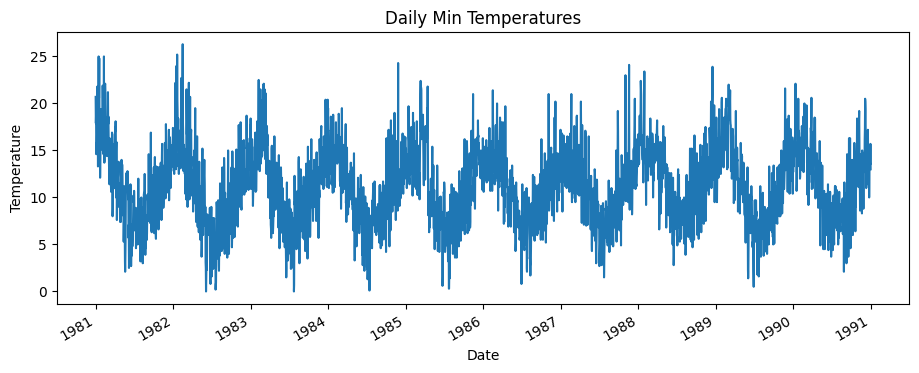

In [7]:
df.plot(title = 'Daily Min Temperatures' , figsize = (11,4), legend = None)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [8]:
differenced_series = df['Temp'].diff(periods = 1)
differenced_series

Date
1981-01-01    NaN
1981-01-02   -2.8
1981-01-03    0.9
1981-01-04   -4.2
1981-01-05    1.2
             ... 
1990-12-27   -0.6
1990-12-28   -0.4
1990-12-29   -0.1
1990-12-30    2.2
1990-12-31   -2.7
Name: Temp, Length: 3650, dtype: float64

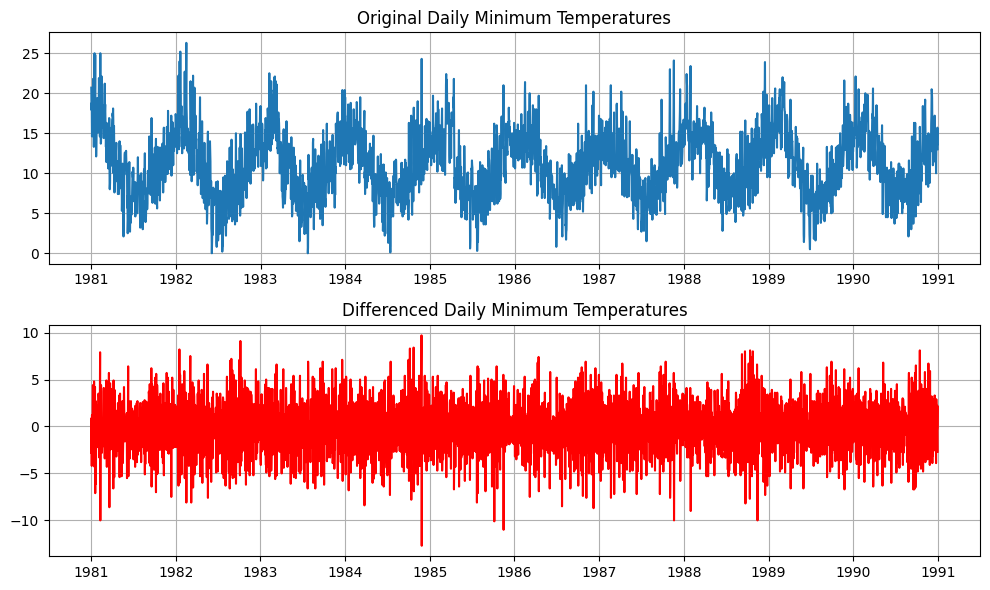

In [9]:
plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.plot(df['Temp'], label = 'Original Series')
plt.title('Original Daily Minimum Temperatures')
plt.grid()

plt.subplot(2,1,2)
plt.plot(differenced_series, label = 'Differenced Series', color = 'red')
plt.title('Differenced Daily Minimum Temperatures')
plt.grid()

plt.tight_layout()
plt.show()

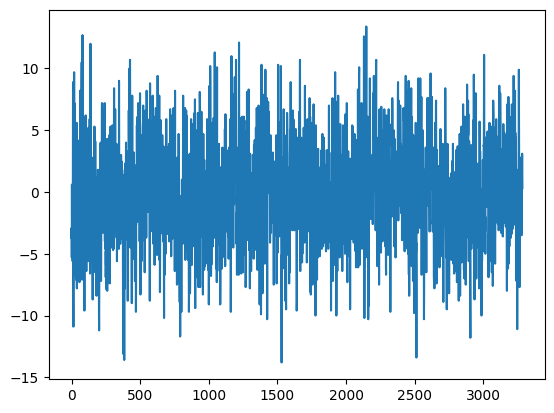

In [10]:
from matplotlib import pyplot

X = df['Temp'].values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
plt.show()

In [11]:
df['diff'] = df['Temp'].diff(periods = 1)
df

,Temp,diff
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,-2.8
1981-01-03,18.8,0.9
1981-01-04,14.6,-4.2
1981-01-05,15.8,1.2
...,...,...
1990-12-27,14.0,-0.6
1990-12-28,13.6,-0.4
1990-12-29,13.5,-0.1


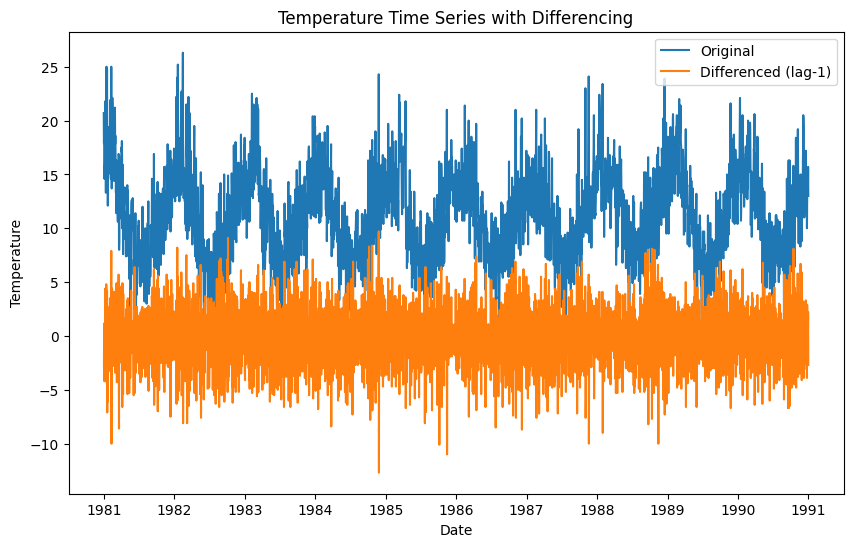

In [12]:
plt.figure(figsize = (10,6))
plt.plot(df.index, df['Temp'], label = 'Original')
plt.plot(df.index, df['diff'], label = 'Differenced (lag-1)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Time Series with Differencing')
plt.legend()
plt.show()

In [35]:
from numpy import polyfit
X = [i%365 for i in range(0, len(df['Temp']))]
y = df['Temp'].values
degree = 4
coef = polyfit(X, y , degree)
print('Coefficients : %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d)*coef[d]
        curve.append(value)

Coefficients : [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


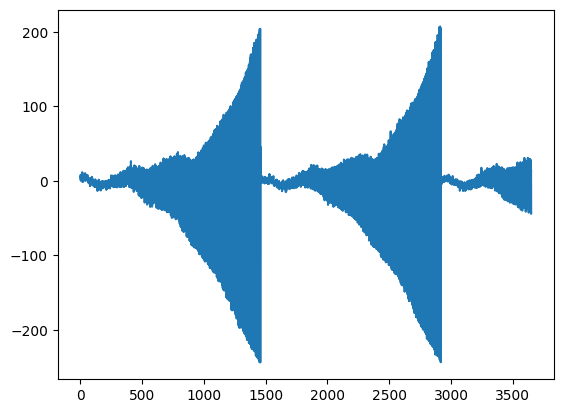

In [36]:
# create seasonally adjusted
values = df['Temp'].values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

Coefficients: 
[2.23555068 2.23555068 2.23555068 2.23555068 2.23555068]


C:\Users\Admin\AppData\Local\Temp\ipykernel_11916\1836609658.py:9: RankWarning: Polyfit may be poorly conditioned
  coef = polyfit(X,y,degree)


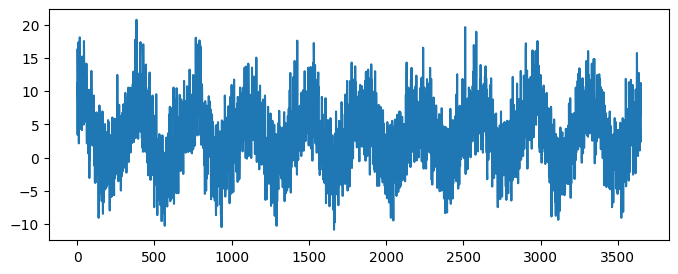

In [18]:
# Fitting polynomial

from numpy import polyfit

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [1%365 for i in range(0, len(df['Temp']))]
y = df['Temp'].values
degree = 4
coef = polyfit(X,y,degree)
print('Coefficients: ')
print(coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d)*coef[d]
        curve.append(value)

# create seasonally adjusted
values = df['Temp'].values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)

plt.figure(figsize=(8,3))
plt.plot(diff)
plt.show()